### Importing Necessary Packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout

### Importing Data

In [2]:
data = pd.read_csv("Churn_Modelling.csv")

In [3]:
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


### Feature Engineering

In [4]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

C:\Users\D100793\AppData\Roaming\Python\Python38\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


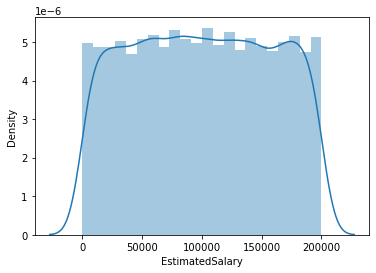

In [5]:
sns.distplot(data['EstimatedSalary'])

Customers with Zero Balance 3617 :



For population where Balance is not equal to zero, stats are given below


C:\Users\D100793\AppData\Roaming\Python\Python38\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


count      6383.000000
mean     119827.493793
std       30095.056462
min        3768.690000
25%      100181.975000
50%      119839.690000
75%      139512.290000
max      250898.090000
Name: Balance, dtype: float64

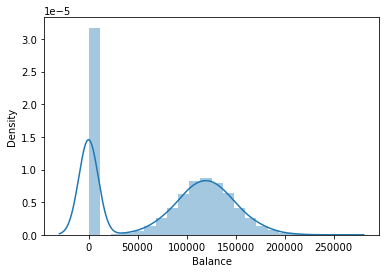

In [6]:
sns.distplot(data['Balance'])
print('Customers with Zero Balance {} :'.format(data.loc[data['Balance']== 0,'Balance'].count()))

print("")
print("")
print("")
print("For population where Balance is not equal to zero, stats are given below")
data.loc[data['Balance'] != 0,'Balance'].describe()

Here we observe that we we have around 3617 out of 10000 customers who have zero balance in the bank account where as other customers  who donot have a zero balance have a mean of 119,827 and a StDev of 30095 which is a big deviation from zero.

We should not consider  the zero balance as outliers as they are these customers are highly likely to leave the bank. So we will be breaking this dataset into two part one with zero balance and other without and running separate models on them using ANN.

C:\Users\D100793\AppData\Roaming\Python\Python38\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


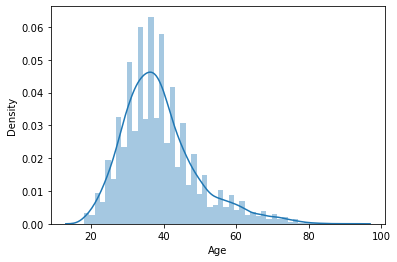

In [7]:
sns.distplot(data['Age'])

In [33]:
upper_boundary=data['Age'].mean() + 3* data['Age'].std()
lower_boundary=data['Age'].mean() - 3* data['Age'].std()
print(lower_boundary), print(uppper_boundary),print(data['Age'].mean())

8.005276661986375
70.38521935511378
38.862823417423016


(None, None, None)

Text(0, 0.5, 'No of Customers')

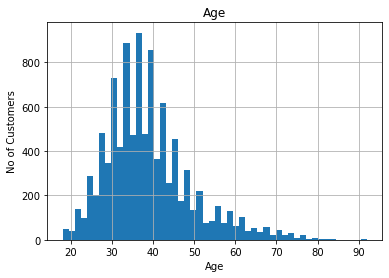

In [9]:
figure=data.Age.hist(bins=50)
figure.set_title('Age')
figure.set_xlabel('Age')
figure.set_ylabel('No of Customers')

Since Age appears to be highly skewed to the right, we will replace all the age greater that 3 Standard Deviation of age by 3*Standard Deviation

In [10]:
data.loc[data['Age']>=uppper_boundary,'Age']=upper_boundary

C:\Users\D100793\AppData\Roaming\Python\Python38\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


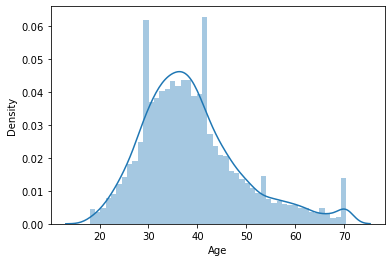

In [11]:
sns.distplot(data['Age'])

C:\Users\D100793\AppData\Roaming\Python\Python38\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


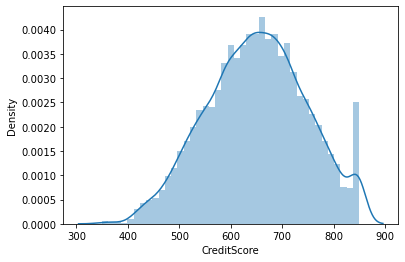

In [12]:
sns.distplot(data['CreditScore'])

In [13]:
geography=pd.get_dummies(data["Geography"],drop_first=True)
gender=pd.get_dummies(data['Gender'],drop_first=True)
data=pd.concat([data,geography,gender],axis=1)
data.drop(columns = 'Geography', inplace = True)
data.drop(columns = 'Gender', inplace = True)
data.drop(columns = 'RowNumber', inplace = True)
data.drop(columns = 'CustomerId', inplace = True)
data.drop(columns = 'Surname', inplace = True)
data

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Germany,Spain,Male
0,619,42.0,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41.0,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42.0,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39.0,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43.0,2,125510.82,1,1,1,79084.10,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39.0,5,0.00,2,1,0,96270.64,0,0,0,1
9996,516,35.0,10,57369.61,1,1,1,101699.77,0,0,0,1
9997,709,36.0,7,0.00,1,0,1,42085.58,1,0,0,0
9998,772,42.0,3,75075.31,2,1,0,92888.52,1,1,0,1


In [14]:
data_zero = data.loc[data['Balance']== 0,]
data_zero

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Germany,Spain,Male
0,619,42.0,2,0.0,1,1,1,101348.88,1,0,0,0
3,699,39.0,1,0.0,2,0,0,93826.63,0,0,0,0
6,822,50.0,7,0.0,2,1,1,10062.80,0,0,0,1
11,497,24.0,3,0.0,2,1,0,76390.01,0,0,1,1
12,476,34.0,10,0.0,2,1,0,26260.98,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9989,841,28.0,4,0.0,2,1,1,179436.60,0,0,1,1
9992,726,36.0,2,0.0,1,1,0,195192.40,0,0,1,1
9994,800,29.0,2,0.0,2,0,0,167773.55,0,0,0,0
9995,771,39.0,5,0.0,2,1,0,96270.64,0,0,0,1


In [15]:
data_non_zero = data.loc[data['Balance'] != 0,:]
data_non_zero

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Germany,Spain,Male
1,608,41.0,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42.0,8,159660.80,3,1,0,113931.57,1,0,0,0
4,850,43.0,2,125510.82,1,1,1,79084.10,0,0,1,0
5,645,44.0,8,113755.78,2,1,0,149756.71,1,0,1,1
7,376,29.0,4,115046.74,4,1,0,119346.88,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9991,597,53.0,4,88381.21,1,1,0,69384.71,1,0,0,0
9993,644,28.0,7,155060.41,1,1,0,29179.52,0,0,0,1
9996,516,35.0,10,57369.61,1,1,1,101699.77,0,0,0,1
9998,772,42.0,3,75075.31,2,1,0,92888.52,1,1,0,1


### Model Development

### For datasets with balance = 0

In [16]:
#y = pd.DataFrame(data_zero['Exited'].map({1: 'Exited', 0 : 'Not Exited'}))
y = data_zero['Exited']
X = data_zero.copy()
X.drop(columns = 'Exited', inplace = True)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [18]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [19]:
# Initialising the ANN
zero_classifier = Sequential()

# Adding the input layer and the first hidden layer
zero_classifier.add(Dense(units = 6, kernel_initializer = 'he_uniform',activation='relu',input_dim = 11))

# Adding the second hidden layer
zero_classifier.add(Dense(units = 6, kernel_initializer = 'he_uniform',activation='relu'))
# Adding the output layer
zero_classifier.add(Dense(units = 1, kernel_initializer = 'glorot_uniform', activation = 'sigmoid'))

# Compiling the ANN
zero_classifier.compile(optimizer = 'Adamax', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
model_history=zero_classifier.fit(X_train, y_train,validation_split=0.33, batch_size = 10, epochs = 100)

Epoch 1/100
194/194 [==============================] - 11s 3ms/step - loss: 0.5702 - accuracy: 0.7435 - val_loss: 0.5455 - val_accuracy: 0.7560
Epoch 2/100
194/194 [==============================] - 0s 1ms/step - loss: 0.4950 - accuracy: 0.8140 - val_loss: 0.5087 - val_accuracy: 0.8147
Epoch 3/100
194/194 [==============================] - 0s 1ms/step - loss: 0.4753 - accuracy: 0.8326 - val_loss: 0.4859 - val_accuracy: 0.8450
Epoch 4/100
194/194 [==============================] - 0s 1ms/step - loss: 0.4620 - accuracy: 0.8388 - val_loss: 0.4694 - val_accuracy: 0.8534
Epoch 5/100
194/194 [==============================] - 0s 1ms/step - loss: 0.4442 - accuracy: 0.8469 - val_loss: 0.4579 - val_accuracy: 0.8576
Epoch 6/100
194/194 [==============================] - 0s 1ms/step - loss: 0.4306 - accuracy: 0.8544 - val_loss: 0.4482 - val_accuracy: 0.8586
Epoch 7/100
194/194 [==============================] - 0s 1ms/step - loss: 0.4222 - accuracy: 0.8579 - val_loss: 0.4402 - val_accuracy: 0.859

Epoch 58/100
194/194 [==============================] - 0s 1ms/step - loss: 0.3192 - accuracy: 0.8849 - val_loss: 0.3330 - val_accuracy: 0.8785
Epoch 59/100
194/194 [==============================] - 0s 1ms/step - loss: 0.2930 - accuracy: 0.8892 - val_loss: 0.3318 - val_accuracy: 0.8785
Epoch 60/100
194/194 [==============================] - 0s 1ms/step - loss: 0.2980 - accuracy: 0.8860 - val_loss: 0.3306 - val_accuracy: 0.8785
Epoch 61/100
194/194 [==============================] - 0s 1ms/step - loss: 0.3089 - accuracy: 0.8859 - val_loss: 0.3295 - val_accuracy: 0.8796
Epoch 62/100
194/194 [==============================] - 0s 1ms/step - loss: 0.2912 - accuracy: 0.8946 - val_loss: 0.3281 - val_accuracy: 0.8796
Epoch 63/100
194/194 [==============================] - 0s 1ms/step - loss: 0.2786 - accuracy: 0.8954 - val_loss: 0.3271 - val_accuracy: 0.8796
Epoch 64/100
194/194 [==============================] - 0s 1ms/step - loss: 0.2970 - accuracy: 0.8911 - val_loss: 0.3258 - val_accuracy:

In [20]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


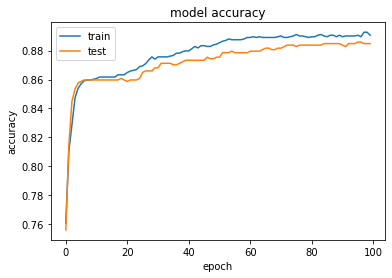

<function matplotlib.pyplot.clf()>

In [21]:
print(model_history.history.keys())
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.clf


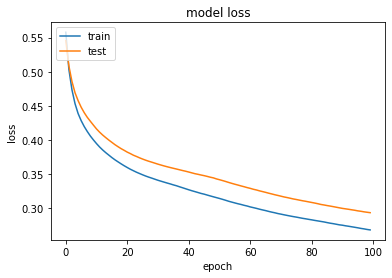

<function matplotlib.pyplot.clf()>

In [22]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.clf

##### Predicting the Test set results

In [23]:
y_pred = zero_classifier.predict(X_test)
y_pred = (y_pred > 0.5)

              precision    recall  f1-score   support

           0       0.89      0.97      0.93       627
           1       0.61      0.26      0.36        97

    accuracy                           0.88       724
   macro avg       0.75      0.62      0.65       724
weighted avg       0.86      0.88      0.86       724

Accuracy: 0.8784530386740331


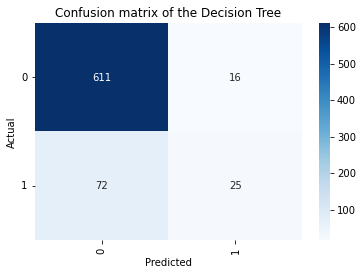

In [24]:
labels = list(set(y_train))
labels.sort()
rf_cm = confusion_matrix(y_test,y_pred, labels = labels)
ax= plt.subplot()
sns.heatmap(rf_cm, annot=True, ax = ax,cmap='Blues',fmt="d"); #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted');ax.set_ylabel('Actual'); 
ax.set_title('Confusion matrix of the Decision Tree'); 
ax.xaxis.set_ticklabels(labels,rotation = 90); 
ax.yaxis.set_ticklabels(labels,rotation = 0);

print(classification_report(y_test, y_pred))

print("Accuracy:",accuracy_score(y_pred,y_test))

### For datasets with balance != 0

In [25]:
y = data_non_zero['Exited']
X = data_non_zero.copy()
X.drop(columns = 'Exited', inplace = True)

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [27]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [28]:
# Initialising the ANN
non_zero_classifier = Sequential()

# Adding the input layer and the first hidden layer
non_zero_classifier.add(Dense(units = 6, kernel_initializer = 'he_uniform',activation='relu',input_dim = 11))

# Adding the second hidden layer
non_zero_classifier.add(Dense(units = 6, kernel_initializer = 'he_uniform',activation='relu'))
# Adding the output layer
non_zero_classifier.add(Dense(units = 1, kernel_initializer = 'glorot_uniform', activation = 'sigmoid'))

# Compiling the ANN
non_zero_classifier.compile(optimizer = 'Adamax', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
model_history=non_zero_classifier.fit(X_train, y_train,validation_split=0.33, batch_size = 10, epochs = 100)

Epoch 1/100
343/343 [==============================] - 1s 2ms/step - loss: 0.7351 - accuracy: 0.6286 - val_loss: 0.6527 - val_accuracy: 0.7050
Epoch 2/100
343/343 [==============================] - 0s 1ms/step - loss: 0.6292 - accuracy: 0.6987 - val_loss: 0.5960 - val_accuracy: 0.7531
Epoch 3/100
343/343 [==============================] - 0s 1ms/step - loss: 0.5764 - accuracy: 0.7608 - val_loss: 0.5667 - val_accuracy: 0.7626
Epoch 4/100
343/343 [==============================] - 0s 1ms/step - loss: 0.5611 - accuracy: 0.7612 - val_loss: 0.5470 - val_accuracy: 0.7739
Epoch 5/100
343/343 [==============================] - 0s 995us/step - loss: 0.5575 - accuracy: 0.7531 - val_loss: 0.5329 - val_accuracy: 0.7780
Epoch 6/100
343/343 [==============================] - 0s 1ms/step - loss: 0.5376 - accuracy: 0.7665 - val_loss: 0.5214 - val_accuracy: 0.7792
Epoch 7/100
343/343 [==============================] - 0s 1ms/step - loss: 0.5085 - accuracy: 0.7820 - val_loss: 0.5146 - val_accuracy: 0.77

Epoch 58/100
343/343 [==============================] - 0s 1ms/step - loss: 0.4288 - accuracy: 0.8068 - val_loss: 0.4270 - val_accuracy: 0.8178
Epoch 59/100
343/343 [==============================] - 0s 1ms/step - loss: 0.3992 - accuracy: 0.8264 - val_loss: 0.4270 - val_accuracy: 0.8196
Epoch 60/100
343/343 [==============================] - 0s 1ms/step - loss: 0.4086 - accuracy: 0.8176 - val_loss: 0.4267 - val_accuracy: 0.8196
Epoch 61/100
343/343 [==============================] - 0s 1ms/step - loss: 0.4079 - accuracy: 0.8169 - val_loss: 0.4264 - val_accuracy: 0.8190
Epoch 62/100
343/343 [==============================] - 0s 1ms/step - loss: 0.4031 - accuracy: 0.8228 - val_loss: 0.4261 - val_accuracy: 0.8196
Epoch 63/100
343/343 [==============================] - 0s 1ms/step - loss: 0.4189 - accuracy: 0.8181 - val_loss: 0.4258 - val_accuracy: 0.8190
Epoch 64/100
343/343 [==============================] - 0s 1ms/step - loss: 0.4218 - accuracy: 0.8157 - val_loss: 0.4256 - val_accuracy:

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


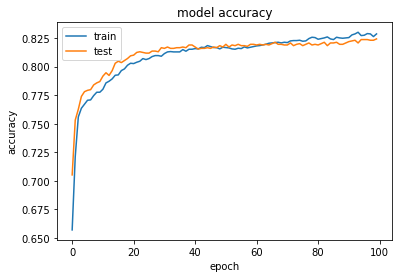

<function matplotlib.pyplot.clf()>

In [29]:
print(model_history.history.keys())
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.clf


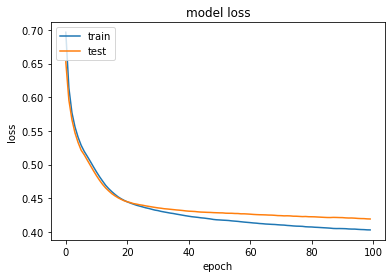

<function matplotlib.pyplot.clf()>

In [30]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.clf

##### Predicting the Test set results

In [31]:
y_pred = zero_classifier.predict(X_test)
y_pred = (y_pred > 0.5)

              precision    recall  f1-score   support

           0       0.80      0.98      0.88      1001
           1       0.67      0.13      0.22       276

    accuracy                           0.80      1277
   macro avg       0.74      0.56      0.55      1277
weighted avg       0.78      0.80      0.74      1277

Accuracy: 0.7987470634299139


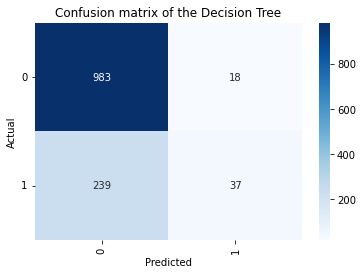

In [32]:
labels = list(set(y_train))
labels.sort()
rf_cm = confusion_matrix(y_test,y_pred, labels = labels)
ax= plt.subplot()
sns.heatmap(rf_cm, annot=True, ax = ax,cmap='Blues',fmt="d"); #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted');ax.set_ylabel('Actual'); 
ax.set_title('Confusion matrix of the Decision Tree'); 
ax.xaxis.set_ticklabels(labels,rotation = 90); 
ax.yaxis.set_ticklabels(labels,rotation = 0);

print(classification_report(y_test, y_pred))

print("Accuracy:",accuracy_score(y_pred,y_test))